# **Project Name**    - Gender Classification Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Deploy a classification model to categorize a user's gender.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [ ]:
# Load Dataset
users_dataset = pd.read_csv("/content/users.csv")

### Dataset First View

In [ ]:
# Dataset First Look
users_dataset.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [ ]:
users_dataset.tail()

,code,company,name,gender,age
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52
1339,1339,Umbrella LTDA,Paul Rodriguez,male,35


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Total number of rows: {users_dataset.shape[0]}")
print(f"Total number of columns: {users_dataset.shape[1]}")

Total number of rows: 1340
Total number of columns: 5


### Dataset Information

In [ ]:
# Dataset Info
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
users_dataset.duplicated().value_counts()

,count
False,1340


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
users_dataset.isna().sum()

,0
code,0
company,0
name,0
gender,0
age,0


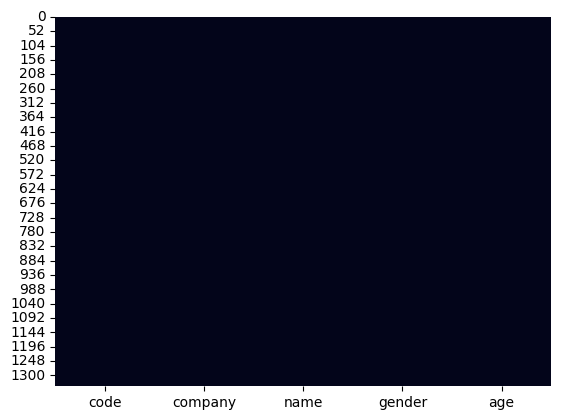

In [ ]:
# Visualizing the missing values
sns.heatmap(users_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 1340
- **Total Columns:** 5

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Dataset all columns name: {list(users_dataset.columns)} \n")
users_dataset.info()

Dataset all columns name: ['code', 'company', 'name', 'gender', 'age'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [ ]:
# Dataset Describe
users_dataset.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [ ]:
users_dataset.describe(include=['object'])

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
users_dataset.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


In [ ]:
# Unique Values for ['company','gender'] variable
column_list = ['company','gender']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {users_dataset[column_name].unique()} \n")

the unique values from column_name:'company' is 
 ['4You' 'Monsters CYA' 'Wonka Company' 'Acme Factory' 'Umbrella LTDA'] 

the unique values from column_name:'gender' is 
 ['male' 'female' 'none'] 



In [ ]:
users_dataset['company'].value_counts(normalize=True)

,proportion
company,
4You,0.338060
Acme Factory,0.194776
Wonka Company,0.176866
Monsters CYA,0.145522
Umbrella LTDA,0.144776


In [ ]:
users_dataset['gender'].value_counts(normalize=True)

,proportion
gender,
male,0.337313
female,0.334328
none,0.328358


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# first of all need to drop the row when gender is none
users_dataset_gender_none = users_dataset[users_dataset['gender'].isin(['none'])]

users_dataset = users_dataset[users_dataset['gender'].isin(['male','female'])].reset_index(drop=True)

In [ ]:
users_dataset.shape, users_dataset_gender_none.shape

((900, 5), (440, 5))

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

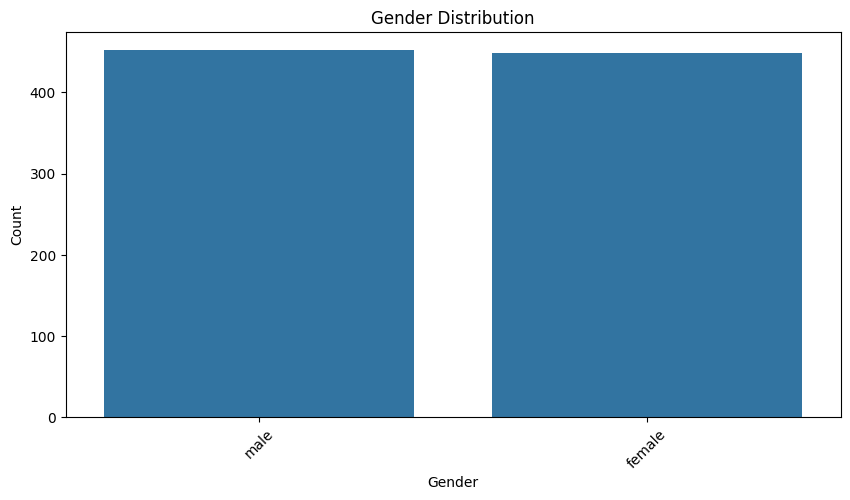

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=users_dataset, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Chart - 2

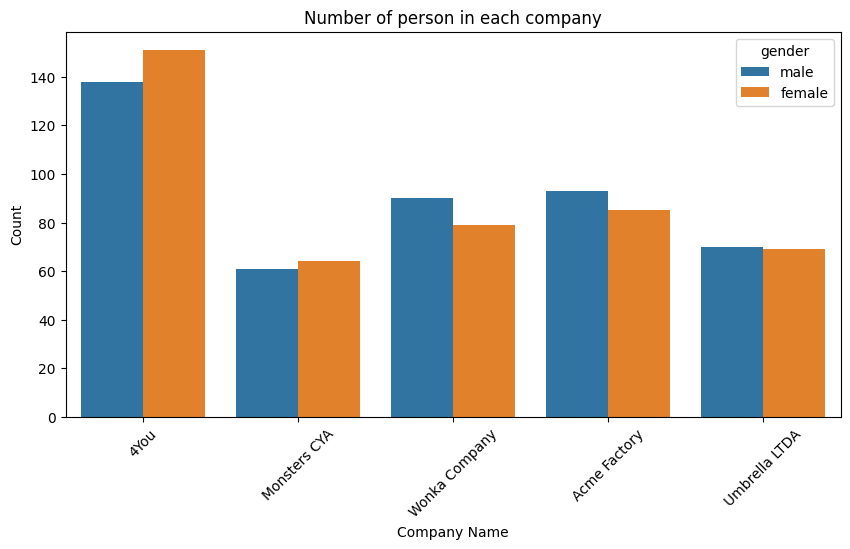

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=users_dataset, x='company', hue='gender')
plt.title('Number of person in each company')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
users_dataset.isna().sum()

,0
code,0
company,0
name,0
gender,0
age,0


In this dataset we do not have any missing value

### 2. Handling Outliers

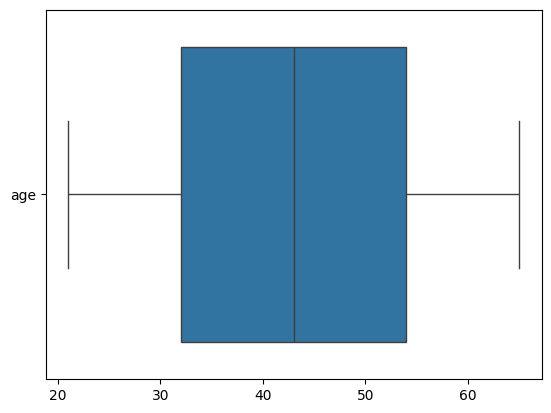

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(users_dataset[['age']],orient="h")
plt.show()

Not any outliers in age feature on this dataset

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode 'gender' and 'company' columns
label_encoder_company = LabelEncoder()
label_encoder_gender = LabelEncoder()

users_dataset['company_encoded'] = label_encoder_company.fit_transform(users_dataset['company'])
users_dataset['gender_encoded'] = label_encoder_gender.fit_transform(users_dataset['gender'])

In [ ]:
users_dataset.head()

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

In [ ]:
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

# Encode the 'name' column
users_dataset['name_embedding'] = users_dataset['name'].apply(lambda x: model.encode(x))

# Apply PCA to reduce the dimensionality of embeddings
n_components = 30
pca = PCA(n_components=n_components)

# Transform embeddings with PCA
name_embeddings_pca = pca.fit_transform(list(users_dataset['name_embedding']))
users_dataset_pca = pd.DataFrame(name_embeddings_pca, columns=[f'PCA_{i}' for i in range(n_components)])

# Combine PCA with original numerical data
users_dataset_processed = pd.concat([users_dataset[['company_encoded', 'age', 'gender_encoded']], users_dataset_pca], axis=1)

In [ ]:
users_dataset_processed.head()

,company_encoded,age,gender_encoded,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,...,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29
0,0,21,1,0.303656,-0.181450,0.023774,0.164738,-0.112270,0.038675,0.009658,...,0.011807,-0.171048,0.007353,0.005557,0.040134,0.040061,0.255863,-0.013520,0.026207,-0.046914
1,0,37,1,0.205229,0.079382,-0.165383,0.042837,-0.078968,-0.139604,0.169572,...,0.083038,-0.136824,-0.120829,0.046618,0.086601,0.111447,0.003766,0.145526,0.007209,-0.115983
2,0,48,0,-0.070750,-0.093101,0.182432,0.036796,0.186918,-0.053705,-0.090422,...,-0.099122,-0.134969,-0.001003,0.101322,-0.154074,-0.086480,-0.065153,0.151333,-0.084958,0.027382
3,0,23,0,-0.258468,-0.088533,0.017526,0.049503,0.037060,0.362381,-0.003688,...,0.014348,0.124962,0.031062,0.170433,0.133663,0.078621,0.077883,-0.042260,0.104934,0.010619
4,0,44,0,-0.228654,-0.042900,0.072362,-0.028979,-0.040438,0.089511,0.080292,...,-0.074665,-0.109042,-0.108517,0.044121,-0.036947,-0.181125,-0.105143,-0.033770,-0.108902,0.022182


In [ ]:
users_dataset_processed.columns

Index(['company_encoded', 'age', 'gender_encoded', 'PCA_0', 'PCA_1', 'PCA_2',
       'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10',
       'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17',
       'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 'PCA_22', 'PCA_23', 'PCA_24',
       'PCA_25', 'PCA_26', 'PCA_27', 'PCA_28', 'PCA_29'],
      dtype='object')

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = users_dataset_processed.drop('gender_encoded', axis=1)
y = users_dataset_processed['gender_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


##### What data splitting ratio have you used and why?

We chose a test size of 10% to ensure that there is enough data for training the model. A random state is specified for reproducibility, ensuring that the split remains consistent across different runs.

This splitting ratio helps in assessing the generalization performance of the model on unseen data and provides a reliable estimate of its performance in real-world scenarios.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# ML Model - 1 Implementation
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy of Random Forest: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.96      0.98        52

    accuracy                           0.98        90
   macro avg       0.97      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



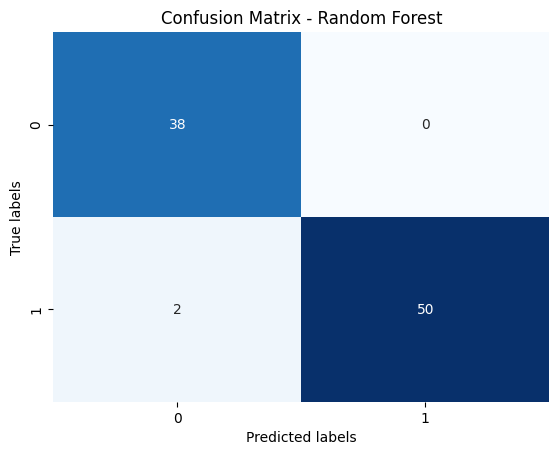

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### ML Model - 2

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# ML Model - 2 Implementation
# Initialize the Logistic Regression model
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy of Logistic Regression: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        52

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



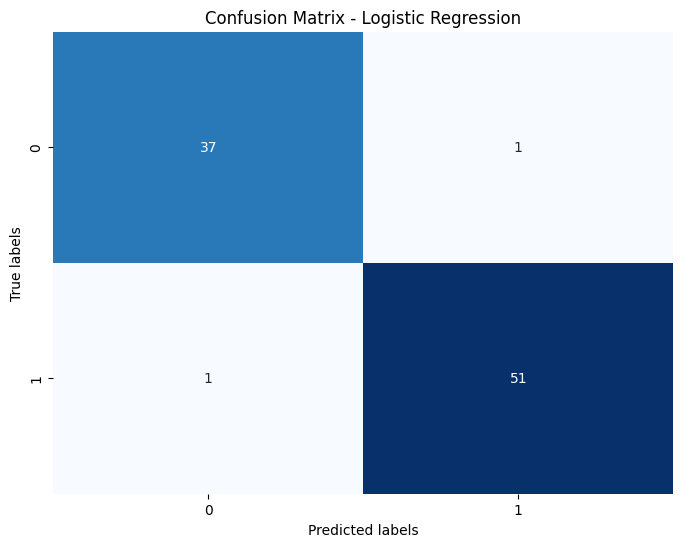

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### ML Model - 3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ML Model - 3 Implementation
# Initialize the Logistic Regression model
lr_classifier_scaled = LogisticRegression(random_state=42)

# Train the model
lr_classifier_scaled.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_lr_scaled = lr_classifier_scaled.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_lr_scaled)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_lr_scaled))

Accuracy of Logistic Regression: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.96      0.98      0.97        52

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.97        90
weighted avg       0.97      0.97      0.97        90



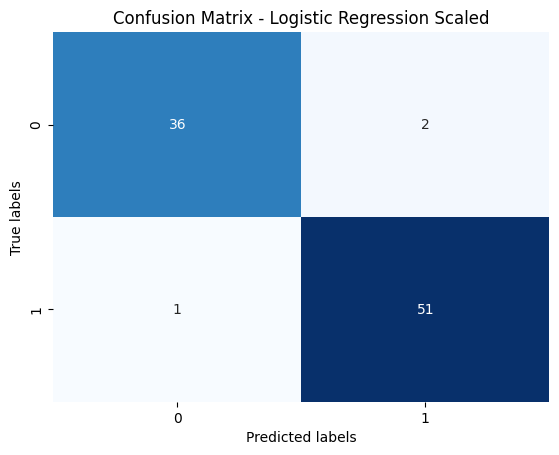

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression Scaled')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
from joblib import dump, load

In [ ]:
gender_classification_folder_path = folder_path+"gender_classification_saved_models/"

In [ ]:
# Save the File
dump(lr_classifier, gender_classification_folder_path+'lr_classifier.joblib') # save the lr_classifier model

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/lr_classifier.joblib']

In [ ]:
dump(pca, gender_classification_folder_path+'pca_model.joblib') # save the PCA model

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/pca_model.joblib']

In [ ]:
dump(label_encoder_company, gender_classification_folder_path+'label_encoder_company.joblib') # save the label encoder

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/label_encoder_company.joblib']

In [ ]:
dump(label_encoder_gender, gender_classification_folder_path+'label_encoder_gender.joblib') # save the label encoder

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/label_encoder_gender.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = load(folder_path+'lr_classifier.joblib')
prediction_from_loaded_model = loaded_model.predict(X_test)

In [ ]:
prediction_from_loaded_model[0:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

#### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# ***Deployment***

In [ ]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib
from sentence_transformers import SentenceTransformer

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

In [ ]:
gender_classification_folder_path = folder_path+"gender_classification_saved_models/"

In [ ]:
# Load pre-trained models
lr_model = joblib.load(gender_classification_folder_path+'lr_classifier.joblib')
pca = joblib.load(gender_classification_folder_path+'pca_model.joblib')
label_encoder_company = joblib.load(gender_classification_folder_path+'label_encoder_company.joblib')
label_encoder_gender = joblib.load(gender_classification_folder_path+'label_encoder_gender.joblib')
sentence_model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Prediction function
def predict_gender(company, name, age):
    # Step 1: Encode the 'company' column
    company_encoded = label_encoder_company.transform([company])[0]

    # Step 2: Encode the 'name' column using SentenceTransformer and apply PCA
    name_embedding = sentence_model.encode(name)
    name_pca = pca.transform([name_embedding])

    # Step 3: Combine all features into a single dataframe
    data = pd.DataFrame({
        'company_encoded': [company_encoded],
        'age': [age]
    })
    data_pca = pd.DataFrame(name_pca, columns=[f'PCA_{i}' for i in range(name_pca.shape[1])])
    data = pd.concat([data, data_pca], axis=1)

    # Step 4: Make prediction using the trained Logistic Regression model
    gender_prediction = lr_model.predict(data)
    gender = label_encoder_gender.inverse_transform(gender_prediction)

    return f"The predicted gender is: {gender[0]}"

# Gradio interface
with gr.Blocks() as app:
    gr.Markdown("### Gender Classification Model")
    gr.Markdown("Enter the user details below to predict the gender.")

    company = gr.Dropdown(choices=['4You', 'Monsters CYA', 'Wonka Company', 'Acme Factory','Umbrella LTDA'], label="Company")
    name = gr.Textbox(label="Name", placeholder="Enter name")
    age = gr.Slider(minimum=18, maximum=100, step=1, value=30, label="Age")

    output = gr.Textbox(label="Prediction")

    predict_button = gr.Button("Predict Gender")

    # Bind the prediction function to the button
    predict_button.click(predict_gender, inputs=[company, name, age], outputs=output)

# Run the Gradio app
app.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://379bf4dc0d8f1bfbcd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://379bf4dc0d8f1bfbcd.gradio.live
